 Outlines
 1. Import libraries
 2. Import Data
 3. Data Cleaning and preparation
 4. EDA
 5. Feature Engineering 
 6. Train test split
 7. Model Build and Evaluation

In [1]:
#import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings 
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
#import data
salary = pd.read_csv(r'C:\Users\aryan\Desktop\DataSets-master\train_salary.csv')
salary.head(10)

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95
5,"Abbey,Emmanuel",CONTRACT SERV SPEC II,A40001,M-R Info Technology,05/01/2013,$52000.00,$47019.75
6,"Abdal-Rahim,Naim A",EMT Firefighter Suppression,A64120,Fire Department,03/30/2011,$62175.00,$61451.50
7,"Abdi,Ezekiel W",POLICE SERGEANT,A99127,Police Department,06/14/2007,$70918.00,$87900.27
8,"Abdul Adl,Attrice A",RADIO DISPATCHER SHERIFF,A38410,Sheriff's Office,09/02/1999,$42438.00,$53667.53
9,"Abdul Aziz,Hajr E",AIDE BLUE CHIP,W02097,Youth Summer,06/18/2014,$11310.00,NaN


In [3]:
#start of data cleaning
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


In [4]:
data = salary.copy()

In [5]:
data.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [6]:
data.columns = data.columns.str.strip()

In [7]:
data.columns

Index(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [8]:
data['AnnualSalary'] = data['AnnualSalary'].apply(lambda x: x.replace('$','')).astype(float)
data['GrossPay'] = data['GrossPay'].str.replace('$','').astype(float)
data.head(10)

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,39686.95
5,"Abbey,Emmanuel",CONTRACT SERV SPEC II,A40001,M-R Info Technology,05/01/2013,52000.0,47019.75
6,"Abdal-Rahim,Naim A",EMT Firefighter Suppression,A64120,Fire Department,03/30/2011,62175.0,61451.50
7,"Abdi,Ezekiel W",POLICE SERGEANT,A99127,Police Department,06/14/2007,70918.0,87900.27
8,"Abdul Adl,Attrice A",RADIO DISPATCHER SHERIFF,A38410,Sheriff's Office,09/02/1999,42438.0,53667.53
9,"Abdul Aziz,Hajr E",AIDE BLUE CHIP,W02097,Youth Summer,06/18/2014,11310.0,NaN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18981 non-null  object 
 1   JobTitle      18981 non-null  object 
 2   AgencyID      18981 non-null  object 
 3   Agency        18981 non-null  object 
 4   HireDate      18911 non-null  object 
 5   AnnualSalary  18981 non-null  float64
 6   GrossPay      15758 non-null  float64
dtypes: float64(2), object(5)
memory usage: 1.0+ MB


In [10]:
data.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
dtype: int64

In [11]:
data['HireDate'] = data['HireDate'].fillna(method = 'ffill')

In [12]:
data.drop('GrossPay',axis=1,inplace=True)
data.head(5)

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0


In [13]:
import datetime as dt

In [14]:
data['HireDate'] = pd.to_datetime(data['HireDate'],errors = 'coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Name          18981 non-null  object        
 1   JobTitle      18981 non-null  object        
 2   AgencyID      18981 non-null  object        
 3   Agency        18981 non-null  object        
 4   HireDate      18981 non-null  datetime64[ns]
 5   AnnualSalary  18981 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 889.9+ KB


In [15]:
data.head(5)

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,2013-06-10,11310.0
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,1979-10-24,53428.0
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,2006-09-25,68300.0
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,2009-07-23,62000.0
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,2013-07-24,43999.0


In [16]:
data['Month_of_recruit'] = pd.DatetimeIndex(data['HireDate']).month
data['Month_of_recruit'] = data['Month_of_recruit'].map({1:'jan',2:'feb',3:'march',4:'april',5:'may',6:'june',7:'july',8:'Aug',9:'sept',10:'oct',11:'nov',12:'dec'})

data.head(5)

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,Month_of_recruit
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,2013-06-10,11310.0,june
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,1979-10-24,53428.0,oct
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,2006-09-25,68300.0,sept
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,2009-07-23,62000.0,july
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,2013-07-24,43999.0,july


<AxesSubplot:xlabel='Month_of_recruit', ylabel='count'>

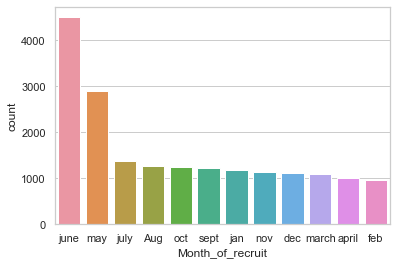

In [17]:
sns.set_style('whitegrid')
sns.countplot(data['Month_of_recruit'],order = data['Month_of_recruit'].value_counts().index)

#Maximum recruitment is in the month of june

Now lets see in which year june had most recruits

In [18]:
data['Year_of_recruit'] = pd.DatetimeIndex(data['HireDate']).year
data.head(5)

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,Month_of_recruit,Year_of_recruit
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,2013-06-10,11310.0,june,2013
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,1979-10-24,53428.0,oct,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,2006-09-25,68300.0,sept,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,2009-07-23,62000.0,july,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,2013-07-24,43999.0,july,2013


In [19]:
june_data = data[data.Month_of_recruit == 'june']

In [20]:
june_data

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,Month_of_recruit,Year_of_recruit
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,2013-06-10,11310.0,june,2013
7,"Abdi,Ezekiel W",POLICE SERGEANT,A99127,Police Department,2007-06-14,70918.0,june,2007
9,"Abdul Aziz,Hajr E",AIDE BLUE CHIP,W02097,Youth Summer,2014-06-18,11310.0,june,2014
10,"Abdul Aziz,Jennah A",AIDE BLUE CHIP,W02097,Youth Summer,2014-06-16,11310.0,june,2014
11,"Abdul Aziz,Yaqub M",AIDE BLUE CHIP,W02097,Youth Summer,2014-06-09,11310.0,june,2014
...,...,...,...,...,...,...,...,...
18930,"Youngfellow,Amber A",AIDE BLUE CHIP,W02479,Youth Summer,2012-06-12,11310.0,june,2012
18943,"Zarro,Antonio",RECREATION ACTIVITIES ASSISTAN,P04001,R&P-Recreation (part-ti,2008-06-23,16640.0,june,2008
18949,"Zektick,Barbara S",EXECUTIVE LEVEL I,A49101,TRANS-Highways,2006-06-12,96390.0,june,2006
18957,"Zerance,Michael A",RECREATION ARTS INSTRUCTOR,P04001,R&P-Recreation (part-ti,2011-06-07,20800.0,june,2011


In [21]:
june_data[june_data.Year_of_recruit > 2000].size

32704

In [22]:
june_data[june_data.Year_of_recruit < 2000].size

3104

Majority of the recruitment done in june are after 2000


In [23]:
#For the entire data we can do the same as


print(data[data.Year_of_recruit > 2000].size)
print(data[data.Year_of_recruit < 2000].size)

107712
41296


For the entire data also .. the majority of recruitments are after 2000

In [24]:
#Top 10 Agencies which gave maximum salary in the month of june --

<AxesSubplot:xlabel='Agency'>

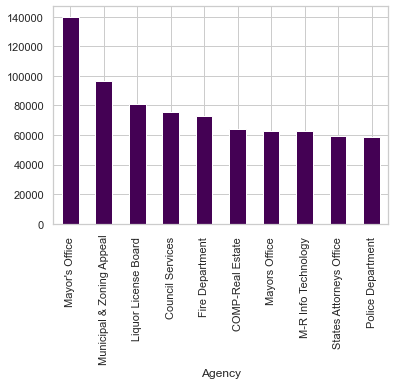

In [25]:
june_data.groupby('Agency')['AnnualSalary'].mean().nlargest(10).plot(kind = 'bar',cmap ='viridis')

Maximum paying agency overall ???


<AxesSubplot:xlabel='Agency'>

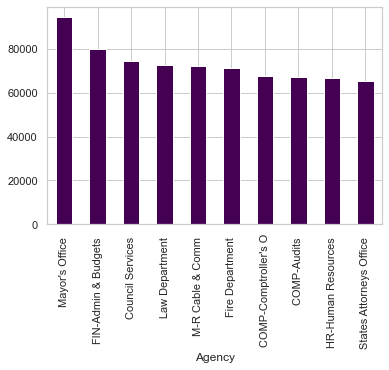

In [26]:
data.groupby('Agency')['AnnualSalary'].mean().nlargest(10).plot(kind = 'bar',cmap = 'viridis')

Even for the entire data Mayor's Office has paid maximum salary to the employees

which job title has the maximum salary overall ?


<AxesSubplot:xlabel='JobTitle'>

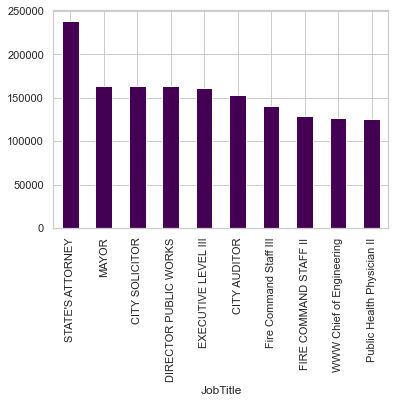

In [27]:
data.groupby('JobTitle')['AnnualSalary'].mean().nlargest(10).plot(kind = 'bar',cmap = 'viridis')

Increase in salary with time .. for june

<AxesSubplot:xlabel='Year_of_recruit'>

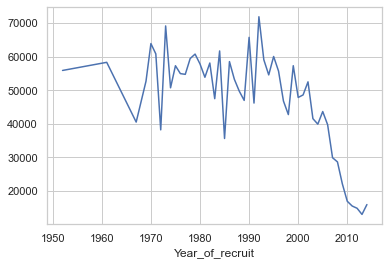

In [28]:
june_data.groupby('Year_of_recruit')['AnnualSalary'].mean().plot(kind = 'line')

LOL instead of increasing the salary got decreased 
maybe becuase the recruitment has increased they reduced pay haha

Lets see the same for the overall data

<AxesSubplot:xlabel='Year_of_recruit'>

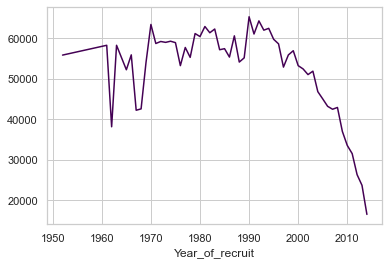

In [29]:
data.groupby('Year_of_recruit')['AnnualSalary'].mean().plot(kind = 'line',cmap='viridis')

same trend follows... here as well

Surprising !! 

In [30]:
## Adding the day column in the data now 
data['Day_of_recruit'] = data['HireDate'].dt.day_name()

In [31]:
data.head(5)

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,Month_of_recruit,Year_of_recruit,Day_of_recruit
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,2013-06-10,11310.0,june,2013,Monday
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,1979-10-24,53428.0,oct,1979,Wednesday
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,2006-09-25,68300.0,sept,2006,Monday
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,2009-07-23,62000.0,july,2009,Thursday
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,2013-07-24,43999.0,july,2013,Wednesday


<AxesSubplot:xlabel='Day_of_recruit', ylabel='count'>

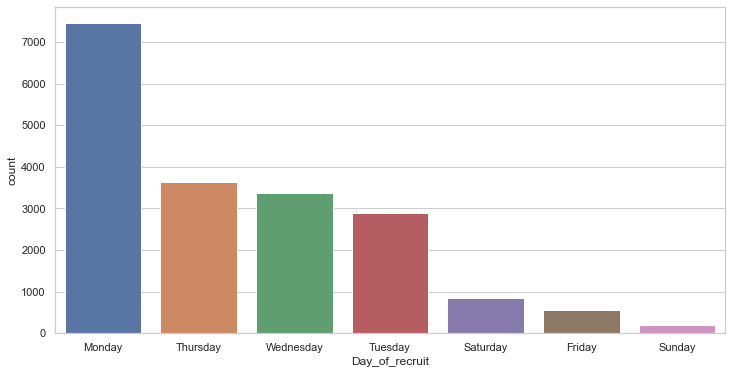

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(data['Day_of_recruit'],order=data['Day_of_recruit'].value_counts().index)

Conclusions till now

1. Most of the recruitments are done after year 2000
2. Most of the recruitments are done in the month of june
3. Most of the recruitments are done on Monday (as seen in the above countplot)
4. Maximum Salary paying Agency is "Mayor's office"
5. State Attorneys are highly paid jobs in the trend 
6. Even when the recruitment has increased after year 2000 the salary pay has decreased.



In [33]:
data['Year_of_recruit'].nunique()

54

<Figure size 1152x576 with 0 Axes>

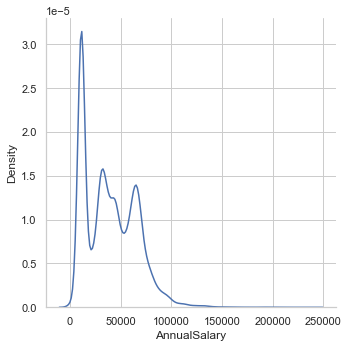

In [34]:
plt.figure(figsize=(16,8))
sns.displot(data,x='AnnualSalary',kind='kde')

<AxesSubplot:xlabel='AnnualSalary'>

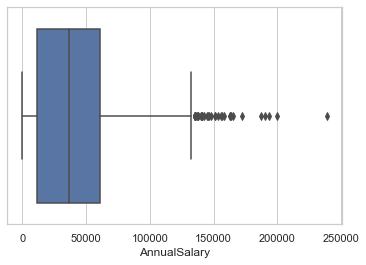

In [35]:
sns.boxplot(data.AnnualSalary)

In [36]:
len(data[data['AnnualSalary']>140000])

25

In [37]:
#dropping the 25 outliers 

<AxesSubplot:xlabel='AnnualSalary'>

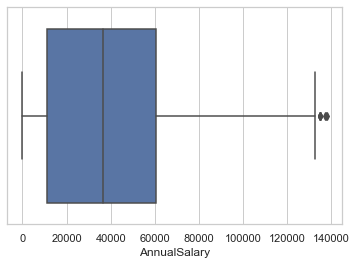

In [38]:
data = data[data['AnnualSalary']<140000]
sns.boxplot(data.AnnualSalary)

In [39]:
data

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,Month_of_recruit,Year_of_recruit,Day_of_recruit
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,2013-06-10,11310.0,june,2013,Monday
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,1979-10-24,53428.0,oct,1979,Wednesday
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,2006-09-25,68300.0,sept,2006,Monday
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,2009-07-23,62000.0,july,2009,Thursday
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,2013-07-24,43999.0,july,2013,Wednesday
...,...,...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,2014-05-21,11310.0,may,2014,Wednesday
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,2014-05-21,11310.0,may,2014,Wednesday
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,2013-12-17,43999.0,dec,2013,Tuesday
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,2013-01-23,44104.0,jan,2013,Wednesday


Top 10 Jobs based on hiring

<AxesSubplot:>

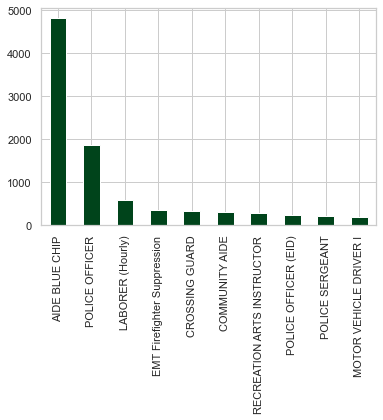

In [40]:
data['JobTitle'].value_counts().nlargest(10).plot(kind='bar',cmap='Greens_r')

<AxesSubplot:>

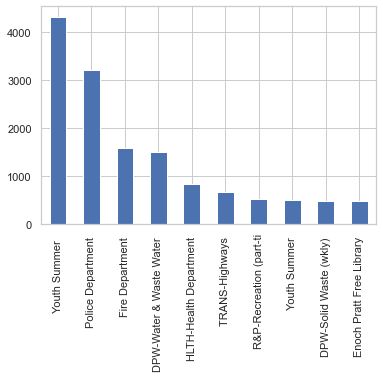

In [41]:
data['Agency'].value_counts().nlargest(10).plot(kind='bar')

<AxesSubplot:>

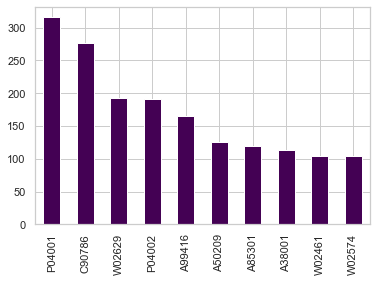

In [42]:
data['AgencyID'].value_counts().nlargest(10).plot(kind='bar',cmap='viridis')

In [43]:
max_jobs = data[data['AnnualSalary'] > data['AnnualSalary'].mean()]

<AxesSubplot:xlabel='JobTitle'>

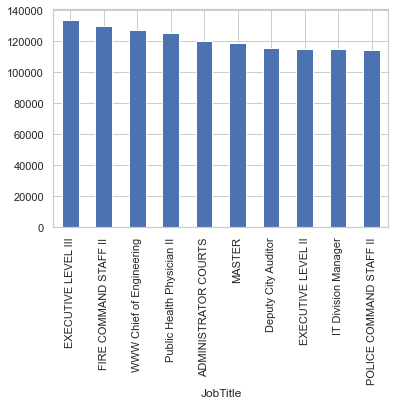

In [44]:
max_jobs.groupby('JobTitle')['AnnualSalary'].mean().nlargest(10).plot(kind='bar')

===========Feature engineering part==============

In [45]:
data['JobTitle'] = data['JobTitle'].map(data.groupby('JobTitle')['AnnualSalary'].mean())
data

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,Month_of_recruit,Year_of_recruit,Day_of_recruit
0,"Aaron,Keontae E",11313.967200,W02200,Youth Summer,2013-06-10,11310.0,june,2013,Monday
1,"Aaron,Patricia G",47443.500000,A03031,OED-Employment Dev,1979-10-24,53428.0,oct,1979,Wednesday
2,"Aaron,Petra L",69750.666667,A29005,States Attorneys Office,2006-09-25,68300.0,sept,2006,Monday
3,"Abaineh,Yohannes T",57940.000000,A65026,HLTH-Health Department,2009-07-23,62000.0,july,2009,Thursday
4,"Abbene,Anthony M",44531.160494,A99416,Police Department,2013-07-24,43999.0,july,2013,Wednesday
...,...,...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",11313.967200,W02235,Youth Summer,2014-05-21,11310.0,may,2014,Wednesday
18977,"Zotamou,Pivot D",11313.967200,W02629,Youth Summer,2014-05-21,11310.0,may,2014,Wednesday
18978,"Zovistoski,Zachary D",44531.160494,A99416,Police Department,2013-12-17,43999.0,dec,2013,Tuesday
18979,"Zubyk,Stanislav T",60588.139335,A99262,Police Department,2013-01-23,44104.0,jan,2013,Wednesday


 Similarly we can do mean mapping to other object columns

In [46]:
data['AgencyID'] = data['AgencyID'].map(data.groupby('AgencyID')['AnnualSalary'].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18955 entries, 0 to 18980
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Name              18955 non-null  object        
 1   JobTitle          18955 non-null  float64       
 2   AgencyID          18955 non-null  float64       
 3   Agency            18955 non-null  object        
 4   HireDate          18955 non-null  datetime64[ns]
 5   AnnualSalary      18955 non-null  float64       
 6   Month_of_recruit  18955 non-null  object        
 7   Year_of_recruit   18955 non-null  int64         
 8   Day_of_recruit    18955 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.4+ MB


In [47]:
data['Agency'] = data['Agency'].map(data.groupby('Agency')['AnnualSalary'].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18955 entries, 0 to 18980
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Name              18955 non-null  object        
 1   JobTitle          18955 non-null  float64       
 2   AgencyID          18955 non-null  float64       
 3   Agency            18955 non-null  float64       
 4   HireDate          18955 non-null  datetime64[ns]
 5   AnnualSalary      18955 non-null  float64       
 6   Month_of_recruit  18955 non-null  object        
 7   Year_of_recruit   18955 non-null  int64         
 8   Day_of_recruit    18955 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 1.4+ MB


Dropping the columns we dont need for the model 

In [48]:
data = data.drop(['HireDate','Name','Day_of_recruit'],axis=1)
data

,JobTitle,AgencyID,Agency,AnnualSalary,Month_of_recruit,Year_of_recruit
0,11313.967200,11310.000000,11310.270645,11310.0,june,2013
1,47443.500000,46667.000000,51495.424242,53428.0,oct,1979
2,69750.666667,65926.133333,64874.560224,68300.0,sept,2006
3,57940.000000,48071.851064,39980.900360,62000.0,july,2009
4,44531.160494,44012.307229,61575.070137,43999.0,july,2013
...,...,...,...,...,...,...
18976,11313.967200,11310.000000,11310.270645,11310.0,may,2014
18977,11313.967200,11310.000000,11346.315789,11310.0,may,2014
18978,44531.160494,44012.307229,61575.070137,43999.0,dec,2013
18979,60588.139335,60203.340426,61575.070137,44104.0,jan,2013


In [49]:
data['Month_of_recruit'] = data['Month_of_recruit'].map({'jan':1,'feb':2,'march':3,'april':4,'may':5,'june':6,'july':7,'Aug':8,'sept':9,'oct':10,'nov':11,'dec':12})

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18955 entries, 0 to 18980
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   JobTitle          18955 non-null  float64
 1   AgencyID          18955 non-null  float64
 2   Agency            18955 non-null  float64
 3   AnnualSalary      18955 non-null  float64
 4   Month_of_recruit  18955 non-null  int64  
 5   Year_of_recruit   18955 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 1.0 MB


In [51]:
data['Month_of_recruit'] = data['Month_of_recruit'].astype(float)


Now the data is ready for split and fit to model

In [52]:
train ,test = train_test_split(data,train_size=0.7,random_state=25)

In [53]:
train.shape

(13268, 6)

In [54]:
y_train = train.pop('AnnualSalary')
x_train = train
y_test = test.pop('AnnualSalary')
x_test = test

We need to scale the train data to avoid bias


In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [56]:
x_train[x_train.columns] = scaler.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scaler.fit_transform(x_test[x_test.columns])

==================Now fitting the model===================== 

In [57]:
linear = LinearRegression()
model = linear.fit(x_train,y_train)

In [58]:
model.score(x_train,y_train)

0.9646861930281927

96 % accuracy over train data

Lets check for test data now

In [59]:
y_predicted = model.predict(x_test)

In [60]:
from sklearn.metrics import r2_score
(r2_score(y_predicted,y_test))*100

96.53658675013685

96 % accuracy over test data as well





=
model equation :


In [61]:
eq = str(model.intercept_)
for i in range(len(model.coef_)):
    eq = eq + ' + ' + str(model.coef_[i])+' * '+str(x_train.columns[i])
eq    

'39781.69809767863 + 22101.032977053583 * JobTitle + 3004.9715137772373 * AgencyID + -1847.9628757116845 * Agency + -136.0601445780033 * Month_of_recruit + -2093.4663431566437 * Year_of_recruit'

# END OF ANALYSIS PROJECT